# Part II - Ford GoBike System Dataset Exploration 
## by Lien Nguyen Doan Kieu Lien

## Investigation Overview


> I wanted to know which factor is affecting to users' riding habits (e.g: age, gender or location). Main goal is to find the root cause and improve the performance of the service if need.


## Dataset Overview

> The dataset includes information of 183.412 ford gobike trips in San Francisco area with 16 variables. But some datas stayed in the mismatched format so it needs to be cleaned.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dataset = pd.read_csv("201902-fordgobike-tripdata.csv")
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# format start_time and end_time to datetime data type
dataset['start_time'] = pd.to_datetime(dataset['start_time'])
dataset['end_time'] = pd.to_datetime(dataset['end_time'])

# format bike_share_for_all_trip to boolean
dataset['bike_share_for_all_trip'] = dataset['bike_share_for_all_trip'].replace({"Yes": True, "No": False}).astype(bool)

## What are the most popular stations to start the trip? (list top 10)

> We can see that many people choose "Market St at 10th St" as a place to start. So in order to make a lot of profit, we need to concentrate more in these areas.

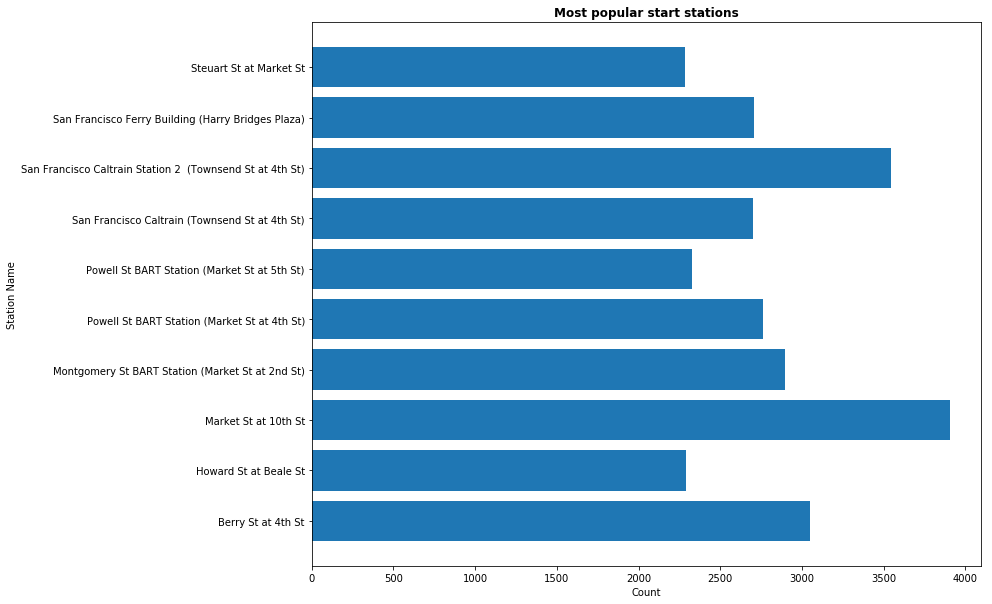

In [5]:
popular_start_station = dataset.groupby(['start_station_name'])['start_station_name'] \
                               .count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False)

# Plot based on the value counts
plt.subplots(figsize=(12,10));
plt.title('Most popular start stations', fontweight='bold')
plt.barh(popular_start_station["start_station_name"][:10], popular_start_station["count"][:10])
plt.xlabel('Count');
plt.ylabel('Station Name');
plt.show();

## What are the distributions in gender in this dataset? 

> The majority of member register for the service is Male.

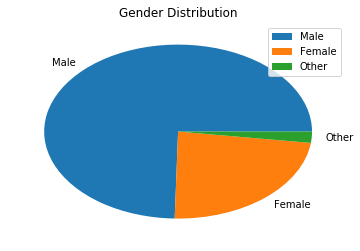

In [6]:
gender_distribute = dataset.groupby(['member_gender'])['member_gender'] \
                           .count() \
                           .reset_index(name='count') \
                           .sort_values(['count'], ascending=False)

plt.pie(gender_distribute['count'], labels=gender_distribute['member_gender'])
plt.legend()
plt.title("Gender Distribution")
plt.show()

## The distribution of members' age

> Mid twenties to Mid forties users seems to have more interested in riding than other ages.

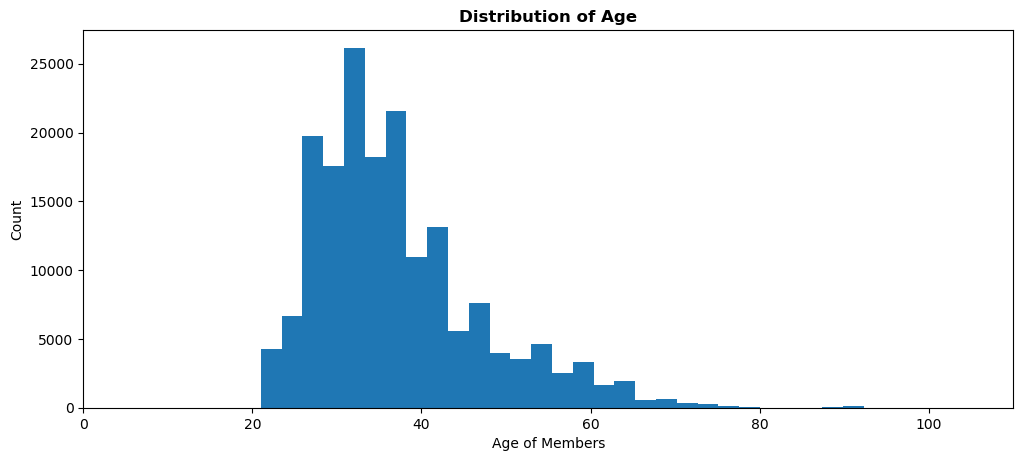

In [7]:
import datetime

today = datetime.date.today()
year = today.year

age_variety = pd.DataFrame(dataset['member_birth_year'])
age_variety.dropna(inplace=True)

age_variety['member_age'] = year - dataset['member_birth_year']

fig, ax = plt.subplots(figsize = (12,5), dpi = 100)
plt.hist(x=age_variety['member_age'], bins=50)
plt.xlim(0,110)
plt.title("Distribution of Age", fontweight='bold')
plt.xlabel("Age of Members")
plt.ylabel("Count")
plt.show()

## The correlation between duration second and Gender

> Female have more elasticity than men because the duration for each ride is way more longer.

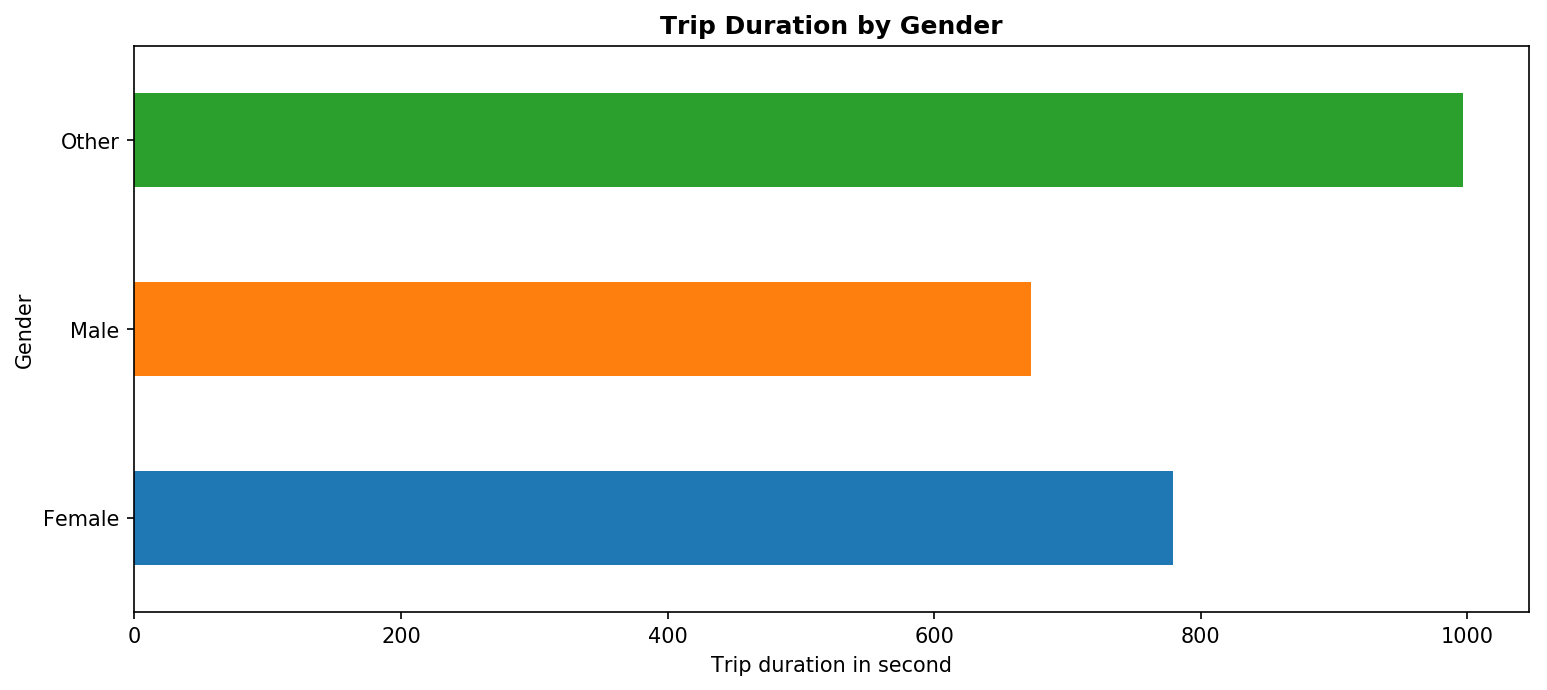

In [8]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
biplot = dataset.groupby('member_gender')['duration_sec'].mean().plot(kind='barh');
biplot.set_title('Trip Duration by Gender', fontweight='bold');
biplot.set_ylabel('Gender');
biplot.set_xlabel('Trip duration in second');
plt.xticks(rotation=0);

## Some relevant between duration, weekday and gender

> It seems that people would prefer to go out on weekends rather than during the week.

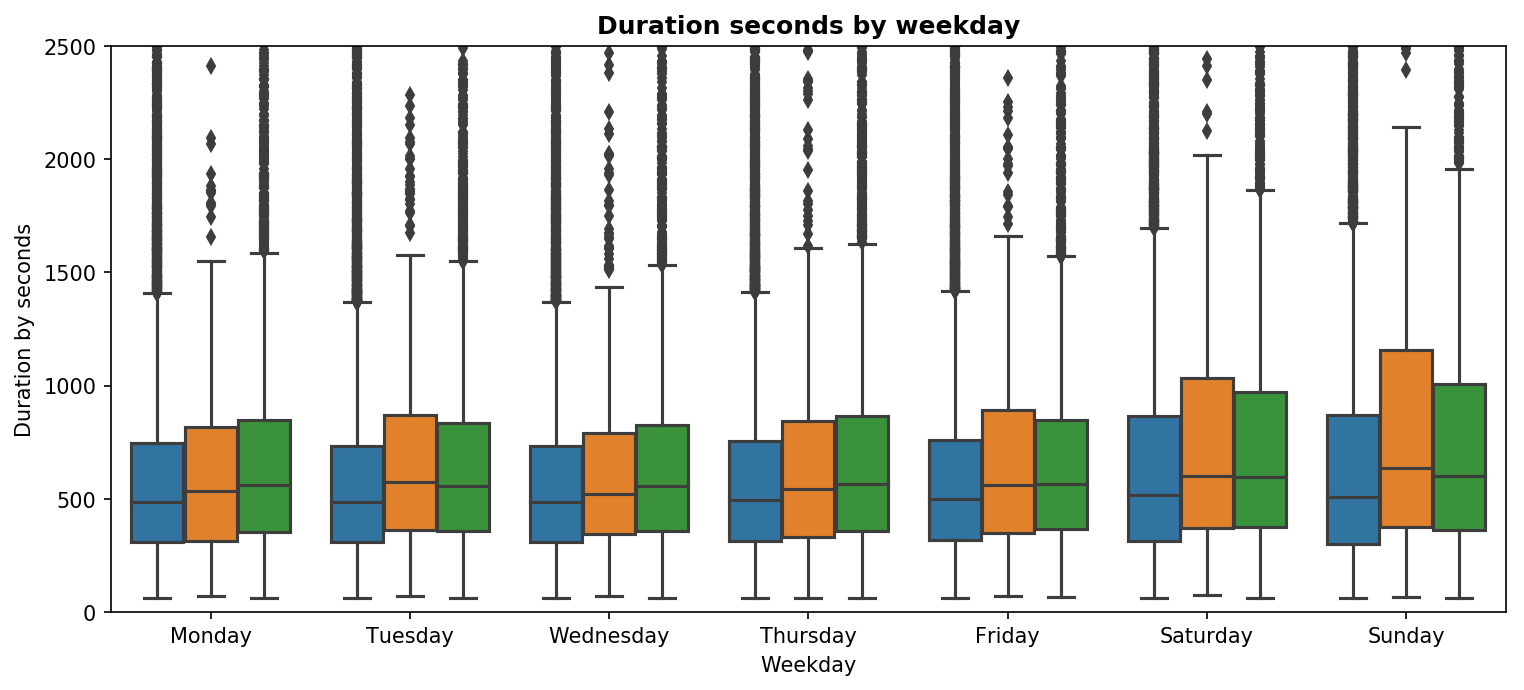

In [9]:
x = dataset['start_time'].dt.day_name()
y = 'duration_sec'
weekday = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
sns.boxplot(data=dataset, x=x, y=y, order=weekday, hue="member_gender")
plt.ylim([0,2500])
plt.title("Duration seconds by weekday", fontweight='bold')
plt.xlabel("Weekday")
plt.ylabel("Duration by seconds")
plt.legend(loc=1)

ax.get_legend().remove()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 464844 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
